In [27]:
import numpy as np
import ot

def wasserstein_distances(original_data, generated_data):
    assert original_data.shape == generated_data.shape, "Both datasets must have the same dimensions."

    n_series = original_data.shape[0]
    wasserstein_distances = np.zeros(n_series)

    for i in range(n_series):
        hist_original, bin_edges_original = np.histogram(original_data[i], bins='auto', density=True)
        hist_generated, bin_edges_generated = np.histogram(generated_data[i], bins='auto', density=True)

        # Ensure both histograms and bin edges have the same number of bins
        n_bins = max(len(hist_original), len(hist_generated))
        hist_original = np.resize(hist_original, n_bins)
        hist_generated = np.resize(hist_generated, n_bins)
        bin_edges_original = np.resize(bin_edges_original, n_bins + 1)
        bin_edges_generated = np.resize(bin_edges_generated, n_bins + 1)

        # Normalize the histograms after resizing
        hist_original = hist_original / hist_original.sum()
        hist_generated = hist_generated / hist_generated.sum()

        # Calculate the cost matrix using the bin edges
        cost_matrix = ot.dist(bin_edges_original[:-1].reshape(-1, 1), bin_edges_generated[:-1].reshape(-1, 1))

        # Compute the Wasserstein distance using the Earth Mover's Distance (EMD)
        wasserstein_distance = ot.emd2(hist_original, hist_generated, cost_matrix)

        wasserstein_distances[i] = wasserstein_distance

    return wasserstein_distances


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram_matrix(original_data, generated_data):
    n_series = original_data.shape[0]
    n_bins = 50

    fig, axes = plt.subplots(n_series, 2, figsize=(10, n_series * 2))
    for i in range(n_series):
        axes[i, 0].hist(original_data[i], bins=n_bins, density=True, alpha=0.75, color='blue', label='Original')
        axes[i, 1].hist(generated_data[i], bins=n_bins, density=True, alpha=0.75, color='green', label='Generated')

        axes[i, 0].set_title(f'Original Series {i + 1}')
        axes[i, 1].set_title(f'Generated Series {i + 1}')

        axes[i, 0].legend()
        axes[i, 1].legend()

    plt.tight_layout()
    plt.show()


In [3]:
import pandas as pd
import numpy as np
generated_data = np.load(r"C:\Users\nati\Desktop\Implementations\FinalProject\FinalProject\DGAN_data\ArticularyWordRecognition\0.7\generated_data.npy",allow_pickle=True)

In [4]:
original_data_path = r'C:\Users\nati\Desktop\Implementations\FinalProject\Datasets\ArticularyWordRecognition\ArticularyWordRecognition_TRAIN.ts'
from sktime.datasets import load_from_ucr_tsv_to_dataframe, load_from_tsfile
from utilities_helper import *

X_og,y_og = load_from_tsfile(original_data_path)
X_og = preprocess_dgan(X_og,144)


In [5]:
X = generated_data.item().get('X')
y = generated_data.item().get('y')


In [13]:
generated_data = X[0:5]
original_data = X_og[0:5]

In [15]:
generated_data.shape

(5, 144, 9)

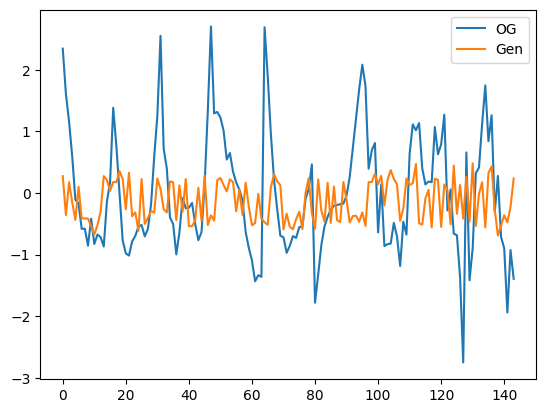

In [16]:
plt.plot(original_data[1,:,4],label = "OG")
plt.plot(generated_data[1,:,4],label = 'Gen')
plt.legend()

In [9]:
original_data.shape

(144, 9)

<AxesSubplot: ylabel='Density'>

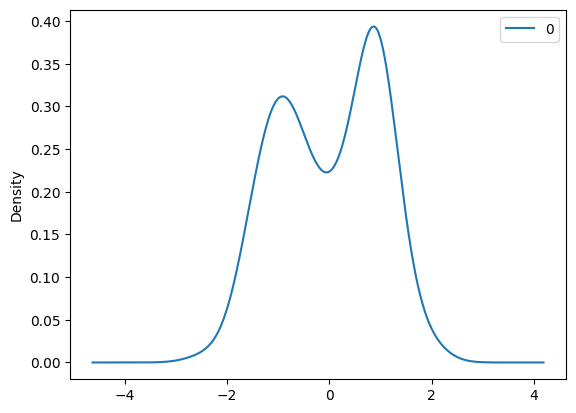

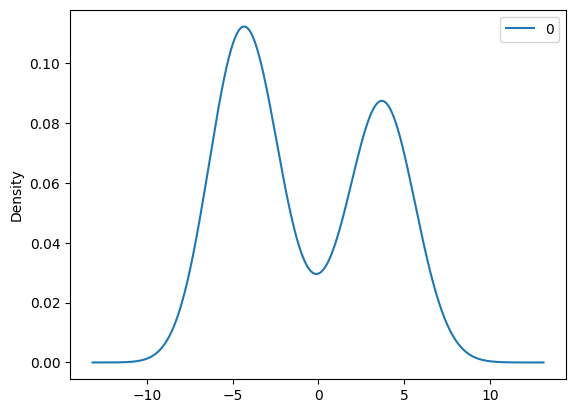

In [101]:
pd.DataFrame(original_data[:,3]).plot(kind='kde' , label = "OG")
pd.DataFrame(generated_data[:,3]*10).plot(kind='kde', label = 'Gen')



(array([0.10841671, 0.43366684, 0.75891679, 1.95150031, 2.71041773,
        2.16833393, 3.36091759, 2.05991747, 1.84308363, 0.21683342]),
 array([-0.43328166, -0.36922839, -0.30517513, -0.24112184, -0.17706856,
        -0.11301529, -0.04896202,  0.01509125,  0.07914452,  0.1431978 ,
         0.20725107]),
 <BarContainer object of 10 artists>)

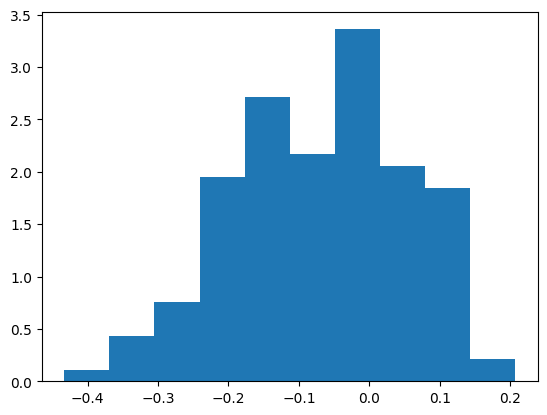

In [77]:
plt.hist(generated_data[4,:],label = 'Gen',density=True)


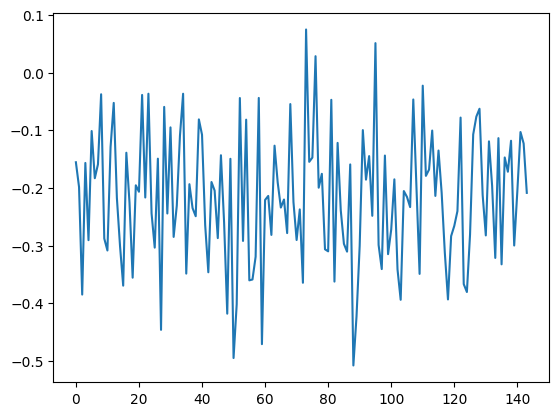

In [57]:
np.transpose(original_data).shape

(9, 144)

In [10]:
original_data = np.transpose(original_data)
generated_data = np.transpose(generated_data)

In [17]:
original_data.shape

(5, 144, 9)

In [22]:
np.swapaxes(generated_data[0],0,1).shape
generated_data[0].shape

(144, 9)

[0.48355338 0.73072915 0.40000155 0.36852779 0.52735155 0.40999535
 0.72308761 0.56855397 0.52248303]


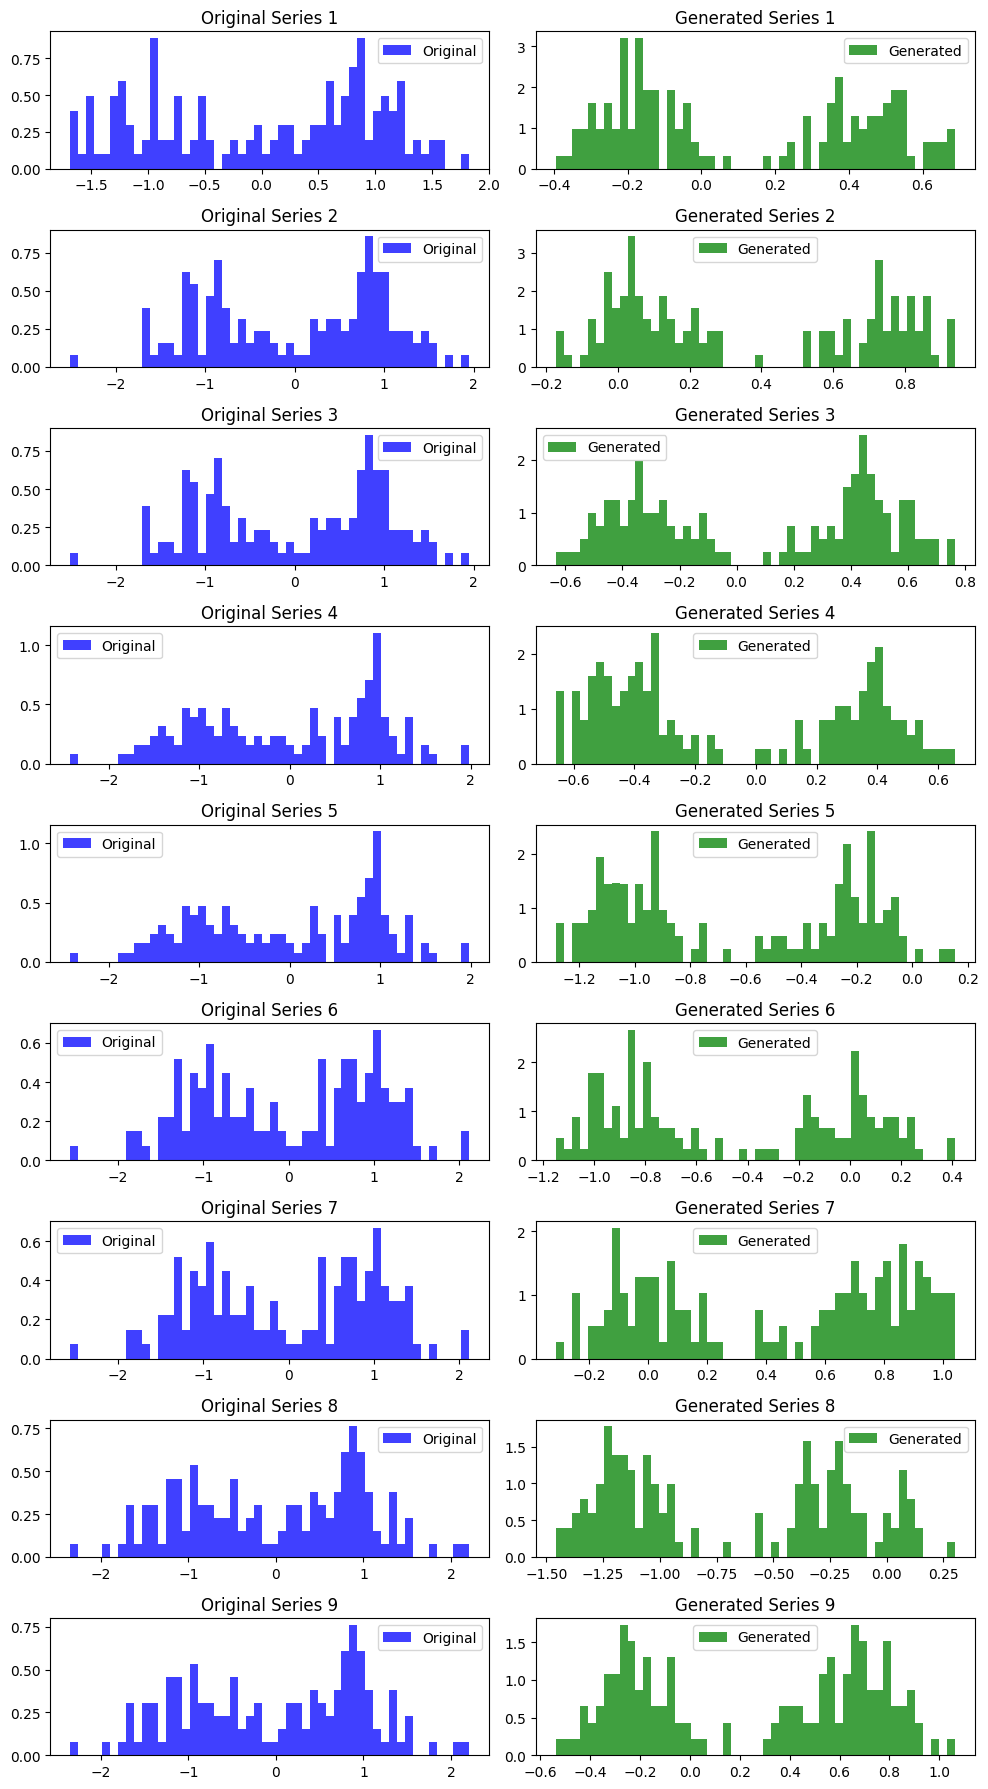

In [28]:
# # Generate synthetic original and generated multivariate time series datasets
# n_series = 5
# n_timesteps = 100
# original_data = np.random.rand(n_series, n_timesteps)
# generated_data = np.random.rand(n_series, n_timesteps)

# original_data[2] =np.exp(original_data[2])
# # Calculate the Wasserstein distances for each corresponding time series

distance = wasserstein_distances(np.swapaxes(original_data[0],0,1), np.swapaxes(generated_data[0],0,1))
print(distance)
plot_histogram_matrix(np.swapaxes(original_data[0],0,1), np.swapaxes(generated_data[0],0,1))
